In [1]:
using Plots, Random, Distributions
path = "C:\\Users\\lucy_\\bats\\radiotrack"
include(string(path,"\\src\\StochasticSimulations.jl"))

Main.StochasticSimulations

In [2]:
function diffusion_step1d(args,x)
    """
    Takes position x,y and returns a new position after a diffusion step
    with diffusion coefficient D and timestep dt
    """
    return x .+ rand(Normal(0,sqrt(2*args.D*args.dt)),args.N)
end

function diffusion_simulation1d(args)
    """
    Stochastic diffusion simulation with discrete time and arguments
    args = (D=diffusion coefficient,N=number of particles,T=time of simulation,dt=timestep)
    returns positions in the trajectory.
    """
    t = args.dt:args.dt:args.T
    x = zeros(Float64,args.N,length(t))
    y = zeros(Float64,args.N,length(t))
    for (j,ts) in enumerate(t[1:end-1])
        x[:,j+1]=diffusion_step1d(args,x[:,j])
    end
    return (x=x,y=y)
end

function boundeddiffusion_simulation1d(args)
    """
    Stochastic diffusion simulation with discrete time and arguments
    args = (D=diffusion coefficient,N=number of particles,T=time of simulation,dt=timestep)
    returns positions in the trajectory.
    """
    t = args.dt:args.dt:args.T
    x = zeros(Float64,args.N,length(t))
    y = zeros(Float64,args.N,length(t))
    for (j,ts) in enumerate(t[1:end-1])
        x[:,j+1]=diffusion_step1d(args,x[:,j])
    end
    return (x=x,y=y)
end

boundeddiffusion_simulation1d (generic function with 1 method)

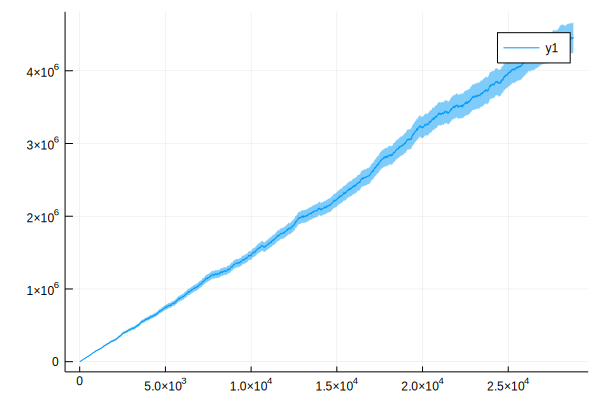

In [5]:
args = (N=1000, D=75, dt=10, T=3600*8, R=3000)

sim1d = args |> diffusion_simulation1d |> StochasticSimulations.square_distance
plot(args.dt:args.dt:args.T,sim1d.MSD',ribbon=sim1d.std_error)

In [112]:

function diffusion_simulation1d(args)
    """
    Stochastic diffusion simulation with discrete time and arguments
    args = (D=diffusion coefficient,N=number of particles,T=time of simulation,dt=timestep)
    returns positions in the trajectory.
    """
    t = args.dt:args.dt:args.T
    x = zeros(Float64,args.N,length(t))
    y = zeros(Float64,args.N,length(t))
    for (j,ts) in enumerate(t[1:end-1])
        x[:,j+1]=diffusion_step1d(args,x[:,j])
    end
    return (x=x,y=y)
end

function boundeddiffusion_simulation1d(args)
    """
    Stochastic diffusion simulation with discrete time and arguments
    args = (D=diffusion coefficient,N=number of particles,T=time of simulation,dt=timestep)
    returns positions in the trajectory.
    """
    t = args.dt:args.dt:args.T
    x = zeros(Float64,args.N,length(t))
    y = zeros(Float64,args.N,length(t))
    for (j,ts) in enumerate(t[1:end-1])
        x[:,j+1]=boundeddiffusion_step1d(args,x[:,j])            
    end
    return (x=x,y=y)
end

boundeddiffusion_simulation1d (generic function with 1 method)

In [113]:
function boundeddiffusion_step1d(args,x)
    """
    Takes position x,y and returns a new position after a diffusion step
    with diffusion coefficient D and timestep dt
    """
    x .+= rand(Normal(0,sqrt(2*args.D*args.dt)),args.N)
    dist = abs.(x) 
    if any(i->(i>=args.R), dist)
        sign = abs.(x[dist.>args.R])./x[dist.>args.R]
        stepback = x[dist.>args.R].-args.R.*sign
        x[dist.>args.R] .= x[dist.>args.R].- 2(stepback)
    end
    return x
end


boundeddiffusion_step1d (generic function with 1 method)

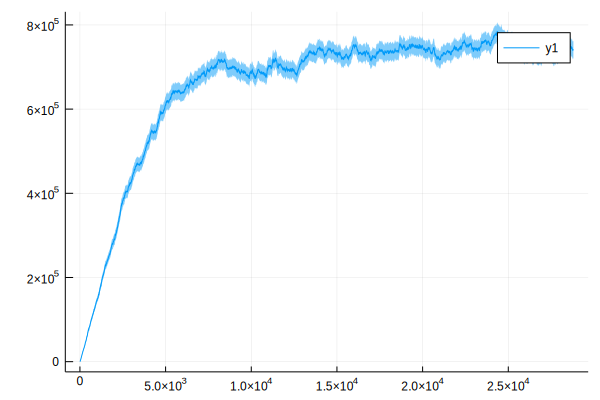

In [114]:
args = (N=1000, D=75, dt=10, T=3600*8, R=1500)

sim1d = args |> boundeddiffusion_simulation1d |> StochasticSimulations.square_distance
plot(args.dt:args.dt:args.T,sim1d.MSD',ribbon=sim1d.std_error)

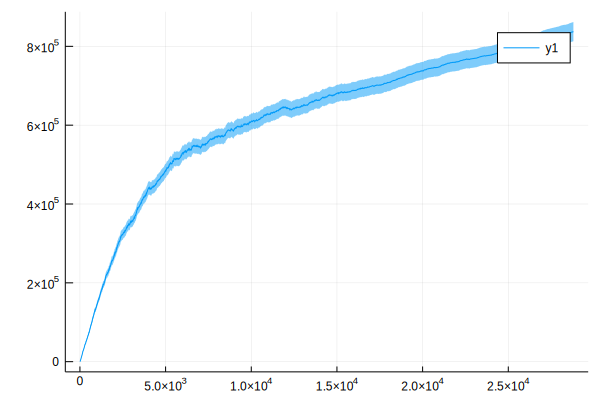

In [134]:
function boundeddiffusion_simulation1d(args)
    """
    Stochastic diffusion simulation with discrete time and arguments
    args = (D=diffusion coefficient,N=number of particles,T=time of simulation,dt=timestep)
    returns positions in the trajectory.
    """
    t = args.dt:args.dt:args.T
    x = zeros(Float64,args.N,length(t))
    y = zeros(Float64,args.N,length(t))
    for (j,ts) in enumerate(t[1:end-1])
        x[:,j+1]=boundeddiffusion_step1d(args,x[:,j],ts)            
    end
    return (x=x,y=y)
end

function boundeddiffusion_step1d(args,x,t)
    """
    Takes position x,y and returns a new position after a diffusion step
    with diffusion coefficient D and timestep dt
    """
    lt = l(args.r,t)
    dlt = dl(args.r,t)
    x .+= rand(Normal(0,sqrt(2*args.D/lt^2*args.dt)),args.N) .+ x.*dlt/lt
    dist = abs.(x) 
    if any(i->(i>=args.R), dist)
        sign = abs.(x[dist.>args.R])./x[dist.>args.R]
        stepback = x[dist.>args.R].-args.R.*sign
        x[dist.>args.R] .= x[dist.>args.R].- 2(stepback)
    end
    return x
end

function l(r,t)
    return exp(r*t)
end

function dl(r,t)
    return r*exp(r*t)
end

args = (N=1000, D=75, dt=10, T=3600*8, R=1500, r=1e-4)

sim1d = args |> boundeddiffusion_simulation1d |> StochasticSimulations.square_distance
plot(args.dt:args.dt:args.T,sim1d.MSD',ribbon=sim1d.std_error)

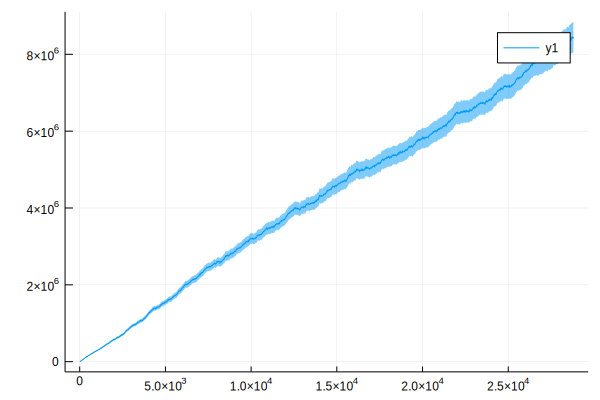

In [10]:
# r = -1e-4
l(t)=1+r*t
dl(t)=r
args = (N=1000, D=75, dt=10, T=3600*8)

sim = args |> diffusion_simulation |> StochasticSimulations.square_distance
plot(args.dt:args.dt:args.T,sim.MSD',ribbon=sim.std_error)

In [39]:
l(3600*8)

0.056134762834133704